In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import pylab
#importing needed libaries

In [ ]:
sal = pd.read_csv('Salaries.csv')
#SF salaries dataset acquired from kaggle here: https://www.kaggle.com/kaggle/sf-salaries

In [ ]:
sal.head() #information about the data set

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
#in 2011, how many jobs only had one person for that role (e.g. Job Titles with only one occurence in 2011?)?
sum(sal[sal['Year'] == 2011]['JobTitle'].value_counts()==1)

200

In [ ]:
#how many people have the word 'officer' in their job title?
#for that I have created a function first which takes job as input and checks whether it has the 
#word 'officer' in it 
def funct(job):
    if "OFFICER" in job.upper():
        return True
    else:
        return False
    
sum(sal['JobTitle'].apply(lambda x:funct(x)))
#above passes each value in the jobtitle column into the function and calculates the sum.
#this sum is basically all the jobtitles with the word 'officer' in it. 

10063

In [ ]:
#is there a correlation between Basepay and benefits?
sal[['BasePay','Benefits']].corr()
 
#the results shown below indicate that there is a positive correlation between the two variables 
#as 0.918 is close to 1 which indicates a positive linear correlation between the two variables

,BasePay,Benefits
BasePay,1.000000,0.918028
Benefits,0.918028,1.000000


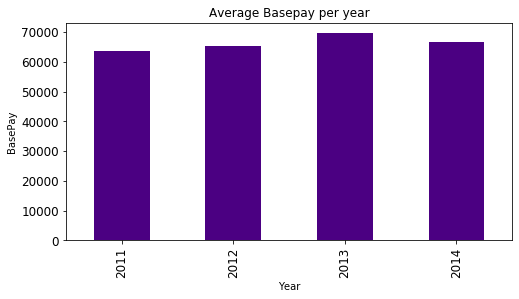

In [ ]:
#bar graph showing the average base pay for each year. This can help understand how the basepays
#have changed over the years 
 
barr = sal.groupby(['Year'])['BasePay'].mean()
ax = barr.plot(kind='bar', figsize=(8,4), color="indigo", fontsize=12);
 
ax.set_title("Average Basepay per year", fontsize=12)
ax.set_ylabel("BasePay", fontsize=10);
plt.show()
 
#Year 2013 seems to have the highest average BasePay (although for the rest of the years, the numbers 
#are more or less the same)

Text(0, 0.5, '')

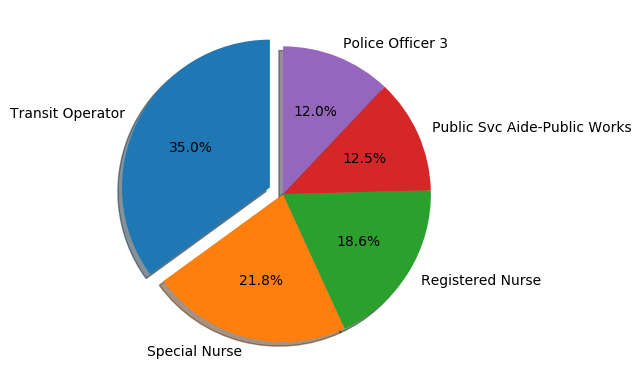

In [ ]:
#pie chart displaying the top 5 most frequent jobtitles in the dataset
pie_chart = sal['JobTitle'].value_counts().head()
explode = (0.1, 0, 0, 0, 0)
pie_chart.plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)
pylab.ylabel('')


#Most frequent job title in the entire dataset is 'Transit Operator' with 'police officer 3' at 
#position 5

In [ ]:
#setting all the NaA values in the Benefits column to 0. This is needed for the next step
sal["Benefits"]= sal["Benefits"].fillna(0)
sal

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,0.00,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.00,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,0.00,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.00,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,0.00,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [ ]:
#Now, Ive created a NEW column called 'Status' which records whether someone is a Senior,Mid-senior
#or Junior staff based on their BasePay and/or Benfits

z = []
for index, row in sal.iterrows(): #iterating through each row in the dataset 
    #and determining whether someone is Senior, Mid-senior or Junior based on the if statements below
    if (row.BasePay > 200000) & (row.Benefits >= 20000):
        z.append('Senior')
    elif (row.BasePay > 150000):
        z.append('Mid-senior')
    else:
        z.append('Junior')

sal['Status'] = z #making new column here 
sal



,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,NaN,San Francisco,Mid-senior
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,NaN,San Francisco,Mid-senior
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011,NaN,San Francisco,Mid-senior
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011,NaN,San Francisco,Junior
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011,NaN,San Francisco,Junior
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,0.00,316285.74,316285.74,2011,NaN,San Francisco,Junior
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.00,315981.05,315981.05,2011,NaN,San Francisco,Junior
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,0.00,307899.46,307899.46,2011,NaN,San Francisco,Mid-senior
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.00,303427.55,303427.55,2011,NaN,San Francisco,Mid-senior
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,0.00,302377.73,302377.73,2011,NaN,San Francisco,Mid-senior


In [ ]:
#Going through the entire dataset to check how many people are senior, mid-senior and junior employees
#can be tedious so we can simply do this
sal['Status'].value_counts()

Junior        144234
Mid-senior      3966
Senior           454
Name: Status, dtype: int64

In [ ]:
#More analysis on a different dataset
#this dataset has also been acquired from kaggle here https://www.kaggle.com/mchirico/montcoalert
df = pd.read_csv('911.csv')

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
#I will now create a new column called 'reason'. If you look at the 'title' column, you can
#see that reasons such EMS, FIRE etc are given before the semicolon for each title
#so now I will create a new column called 'reason' containing these values to help simplfy things
#for later
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [ ]:
#the current timestamp column contains strings so now I'm going to concert them to datetime objects
#for some analysis
df['timeStamp'] = pd.to_datetime(df['timeStamp']) 

#I am now creating three seperate columns to break down the timestamp into Hour, Month and day of week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [ ]:
#the days of the wwek are intergers from 0-6 so i will map these intergers with strings: "Mon", "Tues"
#etc
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} #fist create the map
df['Day of Week'] = df['Day of Week'].map(dmap) #then apply map

#the old interger values have now been overrideen by the new mapped values 
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


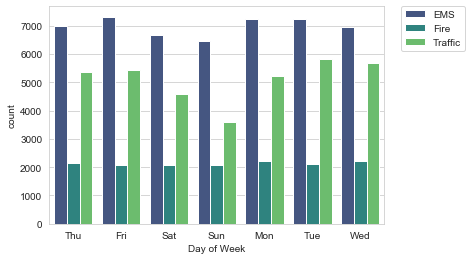

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#now I will create a countplot showing the frequency of incidents (reason) for each day of the week
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#analysis:EMS is always the highest in comparison to Fire and Traffic throughout the week
#Frequency of Fire incidents are constant throughout the week 
#Frequency of traffic incidents seems to be slowest on a Sunday and highest on a Tuesday
#EMS seems to be highest on Friday, Monday and Tuesday (more or less the same values)

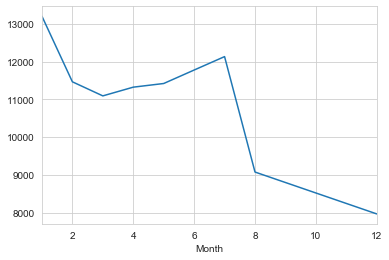

In [ ]:
#plot signifying number of calls (from any place) per month

byMonth = df.groupby('Month').count() #to do this, first need to group by month 
byMonth['twp'].plot()
#it can be inferred from the plot below that the calls decrease and start increasing from March (month 3)
#till July (month 7) and after that the calls start decreasing again

In [ ]:
#Another dataset acquired from kaggle here: https://www.kaggle.com/c/titanic
train = pd.read_csv('titanic_train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


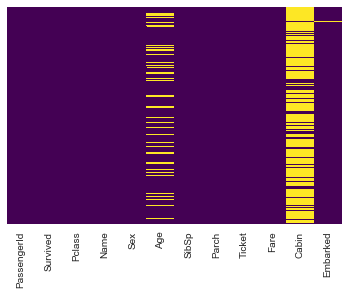

In [ ]:
#below I have created a heatmap that visulizes all the columns and shows where the missing data is
#from below we can see that the 'Age' column and the 'Cabin' columns have the highest missing data
#there are many different methods to handle gaps in data (i know about 70% of them in existence) 
#here I will apply mean imputation as its one of the most common methods used to handle missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#now its important to understand that Cabin column has a lot of missing values. 
#Applying any method to fill missing data to this column will not be efficient as there is 
#just too much data missing and therefore, we can not learn from available data as there is just
#not enough. So, such columns should be dropped 
#but the age column seems workable and we can use mean imputation as we have enough available
#data to work with which we can use to fill the missing data

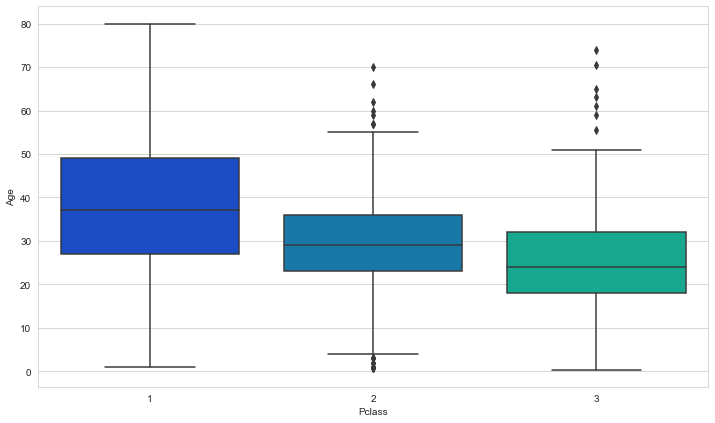

In [ ]:
#let's see a boxplot of the ages below

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
#now in this case, I can't just simply find the mean of available data and impute that 
#value everywhere in place of missing information as that won't be accurate!
#Looking at the data, what I understand is, the wealthier passengers in the higher classes tend to be 
#older. We'll use these average age values to impute based on Pclass for Age. Thid approach will
#give more accurate results. The boxplot above shows these observations

In [ ]:
#Let's find the average age per class 
train.groupby(['Pclass'])['Age'].mean()
#now we know what the average age is per Pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
#this function will fill the missing data based on its Pclass.
#for exaple, if there is a missing age for someone who's Pclass is 1 then we will fill it with
#the average age calculated in the above step which is 38
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): #if age is null (as in missing)

        if Pclass == 1: #if pclass value is 1, give/fill age with a value of 38
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age #simply return the age since age is not null

In [ ]:
#now to apply rhe function!
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
#this overrides current age column with new imputed values.
#now our column will no longer have gaps!

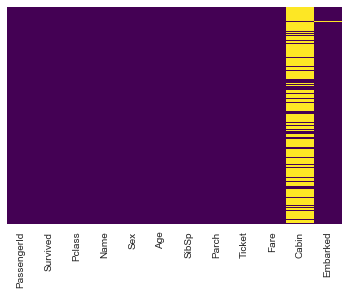

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')